# Purpose 😇

This is a brief notebook to demonstrate how you can save a learner once your model has been trained for later inference (to generate predictions) or to continue training it when new samples become available. 

# Install and load libraries 📚

In [ ]:
# **************** UNCOMMENT AND RUN THIS CELL IF YOU NEED TO INSTALL/ UPGRADE TSAI ****************
stable = False # Set to True for latest pip version or False for main branch in GitHub
!pip install {"tsai -U" if stable else "git+https://github.com/timeseriesAI/tsai.git"} >> /dev/null

  Running command git clone -q https://github.com/timeseriesAI/tsai.git /tmp/pip-req-build-uoszu6pa


In [ ]:
from tsai.all import *
my_setup()

os             : Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
python         : 3.7.13
tsai           : 0.3.2
fastai         : 2.6.0
fastcore       : 1.4.2
torch          : 1.10.0+cu111
device         : 1 gpu (['Tesla T4'])
cpu cores      : 2
RAM            : 12.69 GB
GPU memory     : [14.75] GB


# Train model 🏃‍♀️

epoch,train_loss,valid_loss,accuracy,time
0,1.513164,3.266455,0.359692,00:01
1,1.292064,1.952032,0.419708,00:01
2,1.173235,1.660543,0.409570,00:01
3,1.066340,1.304893,0.555961,00:01
4,0.983043,1.338798,0.532036,00:01
5,0.891155,1.038520,0.690592,00:01
6,0.820258,0.972639,0.678427,00:01
7,0.718465,0.897809,0.706407,00:01
8,0.627895,0.855743,0.726277,00:01
9,0.554346,0.863326,0.721817,00:01


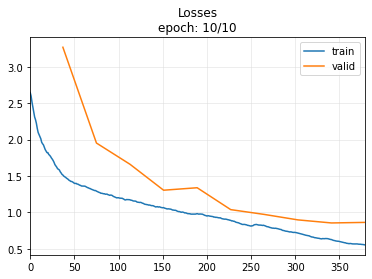

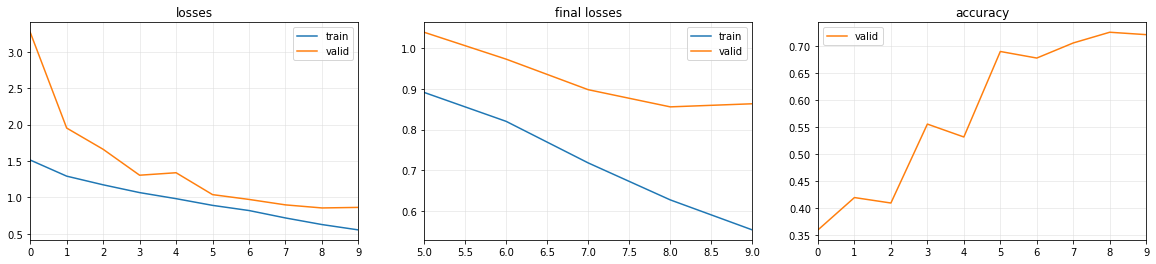

In [ ]:
X, y, splits = get_UCR_data('LSST', split_data=False)
tfms = [None, TSClassification()]
batch_tfms = TSStandardize(by_sample=True)
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, path='/data/')
learn = ts_learner(dls, InceptionTimePlus, metrics=accuracy, cbs=[ShowGraph()])
learn.fit_one_cycle(10, 1e-2)

# Inference: learn.export and load_learner 🚚

If you have finished training, you can export the model for inference using the `export` method.

In [ ]:
learn.export('exported.pth')

When you need to generate predictions you just fo this:

In [ ]:
new_X, *_ = get_UCR_data('LSST', split_data=False)
learn1 = load_learner('/data/exported.pth', cpu=False) # set cpu to True or False depending on your environment
preds, _, decoded_preds = learn1.get_X_preds(new_X)
preds, _, decoded_preds

(TensorBase([[1.2905e-03, 1.5663e-04, 8.7045e-02,  ..., 4.4778e-02, 6.6327e-05,
          2.5620e-03],
         [5.1583e-05, 5.3598e-07, 4.0279e-02,  ..., 1.6094e-04, 8.1969e-08,
          3.4691e-03],
         [2.1993e-02, 1.3445e-05, 1.8652e-01,  ..., 1.3897e-01, 2.7750e-05,
          3.2740e-02],
         ...,
         [8.9264e-04, 5.0546e-05, 2.5908e-01,  ..., 3.3627e-03, 7.0707e-05,
          6.4735e-01],
         [1.9133e-02, 3.7902e-06, 2.5041e-01,  ..., 6.3816e-01, 5.1981e-05,
          1.9923e-02],
         [1.4637e-04, 1.6800e-06, 5.7432e-01,  ..., 7.2760e-04, 8.9442e-07,
          2.3213e-01]]),
 None,
 array(['6', '6', '62', ..., '95', '90', '42'], dtype='<U2'))

# Partial fit or fine tuning 🏋️‍♂️

There's another way to export the learner keeping the optimizer state in case we need to keep training the model on some new data. `save` will save the model and optimizer state.

In [ ]:
learn.save('test')

Path('/data/models/test.pth')

When we have some new data, we'll create a new learner as before and load the model weights and optimizer state. Then we can fit the model on some more epochs or fine tune it. You can try both methods and see which one works best in your case.

## Incremental learning: 🙇🏽‍♀️

epoch,train_loss,valid_loss,accuracy,time
0,0.501133,0.890488,0.717356,00:01


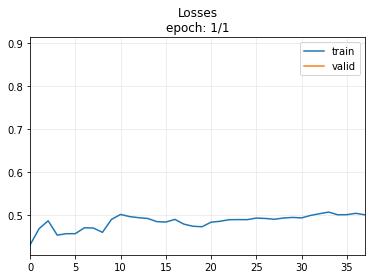

not enough values to plot a chart


In [ ]:
new_X, new_y, new_splits = get_UCR_data('LSST', split_data=False)
tfms = [None, TSClassification()]
batch_tfms = TSStandardize(by_sample=True)
dls2 = get_ts_dls(new_X, new_y, splits=new_splits, tfms=tfms, batch_tfms=batch_tfms, path='/data/')
learn2 = ts_learner(dls2, InceptionTimePlus, metrics=accuracy, cbs=[ShowGraph()])
learn2 = learn2.load('/data/models/test', device=device)
learn2.fit_one_cycle(1)

## Fine-tuning 📻

epoch,train_loss,valid_loss,accuracy,time
0,0.485616,0.887381,0.710057,00:01


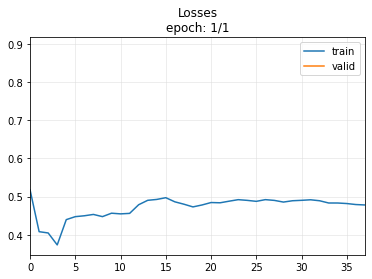

not enough values to plot a chart


epoch,train_loss,valid_loss,accuracy,time
0,0.477844,0.890763,0.710462,00:01


not enough values to plot a chart


In [ ]:
new_X, new_y, new_splits = get_UCR_data('LSST', split_data=False)
tfms = [None, TSClassification()]
batch_tfms = TSStandardize(by_sample=True)
dls3 = get_ts_dls(new_X, new_y, splits=new_splits, tfms=tfms, batch_tfms=batch_tfms, path='/data/')
learn3 = ts_learner(dls3, InceptionTimePlus, metrics=accuracy, cbs=[ShowGraph()])
learn3 = learn3.load('/data/models/test', device=device)
learn3.fine_tune(1)